* 下载anaconda,可以通过anaconda安装不同python环境,进行管理.
* 打开终端输入conda create -n py27 python=2.7,安装python2.7命名为py27.
* 进入python2.7环境,在mac系统终端上输入conda activate py27或者source activate py27,win系统终端输入activate py27.
* 在python2.7环境里,在终端输入pip install ipykernel,给python2.7安装ipykernel.
* 在python2.7环境里,通过ipykernel给Jupyter notebook加环境,输入python -m ipykernel install --name py27,如果不行的话用sudo权限安装,输入sudo python -m ipykernel install --name py27,装好以后会返回一个my kernel的地址.mac系统上不用配置path路径.
* 退出python2.7环境,mac系统在终端输入conda deactivate或source deactivate,win系统在终端输入deactivate. 
* 查看已有的kernel,输入jupyter kernelspec list.
* 安装决策树可视化工具Graphviz,mac系统先安装homebrew,将以上命令粘贴至终端/usr/bin/ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"
* 安装完homebrew后,再次行命令 brew install graphviz.安装完试一下import graphviz,报错的话可以用pip install graphviz安装.


In [1]:
print "aaaa"    #py 2.7

aaaa


In [1]:
print ("aaaa")    #py 2.7  py3.7

aaaa


In [4]:
import graphviz #不报错,说明graphviz安装成功

In [1]:
import sklearn.datasets as datasets
import pandas as pd
iris= datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

In [2]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(df,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

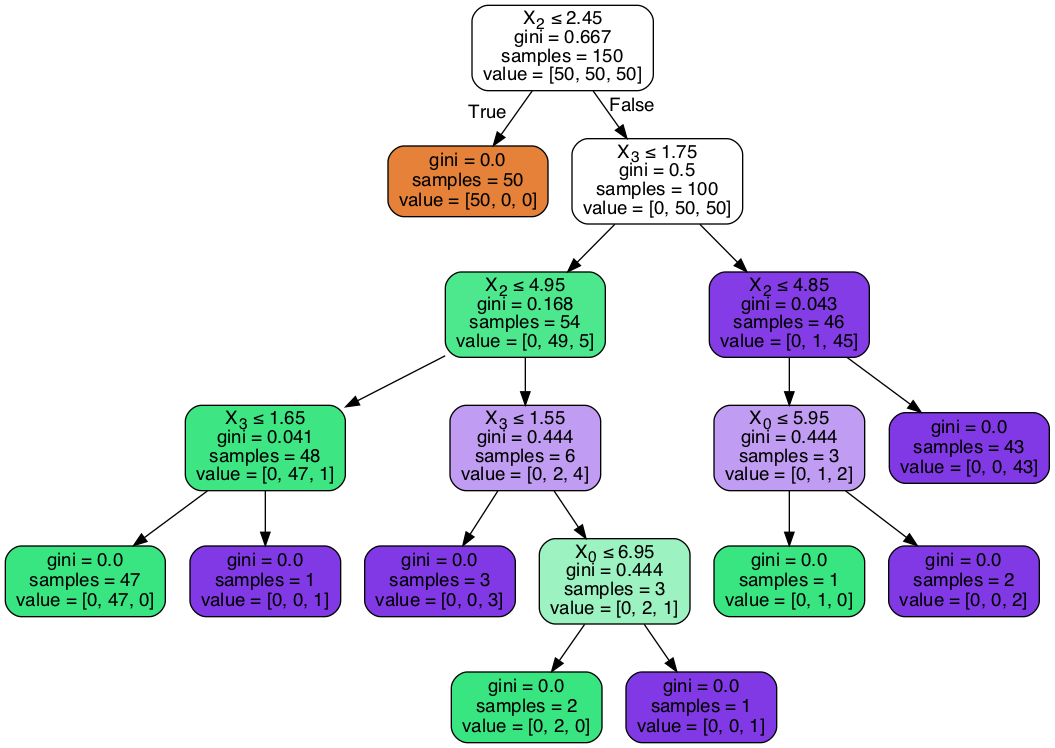

In [6]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,
                       filled=True, rounded=True,
                       special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## 几个重要的工具包介绍
import numpy as np
import scipy
import pandas as pd
import sklearn   ##集成了机器学习工具
import keras.backend as K
import tensorflow as tf

## numpy
numpy定义了python进行矩阵数值计算的基础
np.add(A,B)
np.subtract(A,B)
np.dot(C,D)
np.matmul(C,D)  ##C @ D
np.multiply(C,D)  ##C * D


In [7]:
import numpy as np
A = np.array([1,2,3])
B = np.array([4,3,0])
print("A+B = ",np.add(A,B))
print("A-B = ",np.subtract(A,B))

A+B =  [5 5 3]
A-B =  [-3 -1  3]


In [10]:
C = np.array([[1,2,3],
                  [1,1,1]])
D = np.array([[4,3,9,9],
                 [1,1,2,2],
                 [4,2,1,1]])
print('np.dot(C,D) = ',np.dot(C,D))
print('np.matmul(C,D) = ',np.matmul(C,D)) #矩阵相乘
print('C @ D = ',np.matmul(C,D))  #矩阵相乘
print('np.multiply(D,D) = ',np.multiply(D,D))  #元素与元素相乘,对应元素相乘
print('D * D = ', D*D)  #元素与元素相乘,对应元素相乘


np.dot(C,D) =  [[18 11 16 16]
 [ 9  6 12 12]]
np.matmul(C,D) =  [[18 11 16 16]
 [ 9  6 12 12]]
C @ D =  [[18 11 16 16]
 [ 9  6 12 12]]
np.multiply(D,D) =  [[16  9 81 81]
 [ 1  1  4  4]
 [16  4  1  1]]
D * D =  [[16  9 81 81]
 [ 1  1  4  4]
 [16  4  1  1]]


In [11]:
C.shape

(2, 3)

In [12]:
D.shape

(3, 4)

In [13]:
C@D

array([[18, 11, 16, 16],
       [ 9,  6, 12, 12]])

In [14]:
A*A

array([1, 4, 9])

# Python numpy 矩阵乘法multiply()、dot()、 matmul()、' * '、'@'辨析
分类:

元素相乘:multply()
矩阵相乘:dot()、matmul()、’@’.

’ * ': 是特别的,在数组操作中，作为元素相乘；在矩阵操作中作为矩阵相乘。

以下举例说明：

import numpy as np

1在数组上操作的效果：

a1 = np.array([[1,2,3],[4,5,6]])

b1 = np.array([1,2,3])

a2 = np.array([1,2,3])

b2 = np.array([1,2,3])
* a1 * b1 # 对应元素相乘

[[ 1  4  9]
 [ 4 10 18]]
* a1 @ b1 #　矩阵相乘

[14 32]
* a2 * b2 #　对应元素相乘

[1 4 9]
* a2 @ b2 #　矩阵相乘
* np.multiply(a1, b1),np.multiply(a2, b2) # 对应元素相乘

(array([[ 1,  4,  9],
        [ 4, 10, 18]]),
        array([1, 4, 9]))
* np.dot(a1, b1), np.dot(a2, b2) # 矩阵相乘

(array([14, 32]), 14)

* np.matmul(a1, b1), np.matmul(a2, b2) # 矩阵相乘

(array([14, 32]), 14)

2在矩阵上的效果：

a3 = np.matrix([[1,2,3],[4,5,6]])

b3_1 = np.matrix([1,2,3])

b3 = np.matrix([[1],[2],[3]])
* a3 * b3 # 矩阵相乘
[[14]
 [32]]

* a3 @ b3 # 矩阵相乘
[[14]
 [32]]

* np.multiply(a3,b3_1) # 对应元素相乘
matrix([[ 1,  4,  9],[ 4, 10, 18]])

* np.dot(a3, b3) # 矩阵相乘
matrix([[14],[32]])

* np.matmul(a3, b3) # 矩阵相乘
matrix([[14],[32]])

1维和2维矩阵的乘法

In [4]:
import numpy as np
a = np.array([1,2,3])
b = np.array([[1,1,1],
                 [2,2,2],
                 [3,3,3]])

In [5]:
np.dot(a,b)

array([14, 14, 14])

In [6]:
np.matmul(a,b)

array([14, 14, 14])

In [7]:
#注意
#元素乘积
a*b #扩展维度后,元素乘积

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

多维矩阵乘积的比较

In [10]:
m_4_4 = np.array([[1,2,3,4],
                         [3,2,1,4],
                         [5,4,6,7],
                         [11,12,13,14]])
m_3_4_2 = np.array([[[2,3],
                               [11,9],
                               [32,21],
                               [28,17]],
                              [[2,3],
                               [1,9],
                               [3,21],
                               [28,7]],
                              [[2,3],
                               [1,9],
                               [3,21],
                               [28,7]]
                               ])

In [11]:
print(m_4_4.shape)
print(m_3_4_2.shape)

(4, 4)
(3, 4, 2)


In [13]:
print('4x4*3x4x2 dot:\n {} \n' .format(np.dot(m_4_4,m_3_4_2)))
print('4x4*3x4x2 matmul:\n {} \n' .format(np.matmul(m_4_4,m_3_4_2)))

4x4*3x4x2 dot:
 [[[232 152]
  [125 112]
  [125 112]]

 [[172 116]
  [123  76]
  [123  76]]

 [[442 296]
  [228 226]
  [228 226]]

 [[962 652]
  [465 512]
  [465 512]]] 

4x4*3x4x2 matmul:
 [[[232 152]
  [172 116]
  [442 296]
  [962 652]]

 [[125 112]
  [123  76]
  [228 226]
  [465 512]]

 [[125 112]
  [123  76]
  [228 226]
  [465 512]]] 



In [14]:
print('4 4 矩阵 与')
print('3 4 2矩阵的乘积结果')
print('dot 结果的维度       =', np.dot(m_4_4,m_3_4_2).shape)
print('matmul 结果的维度 =', np.matmul(m_4_4,m_3_4_2).shape)

4 4 矩阵 与
3 4 2矩阵的乘积结果
dot 结果的维度       = (4, 3, 2)
matmul 结果的维度 = (3, 4, 2)


检验以下m_4_4与m3_4_2最后两维矩阵的矩阵乘积结果

In [15]:
np.dot(m_4_4,m_3_4_2[0,:,:])

array([[232, 152],
       [172, 116],
       [442, 296],
       [962, 652]])

In [16]:
np.matmul(m_4_4,m_3_4_2[:,:,0].T)

array([[232, 125, 125],
       [172, 123, 123],
       [442, 228, 228],
       [962, 465, 465]])

np.dot定义:dot(a,b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])

In [17]:
import sklearn 

In [18]:
from sklearn import datasets
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [5]:
import tensorflow as tf

# Jupyter notebook的使用技巧
以下所有操作都需要在命令模式下完成(按ESC或者点击编辑框外的空白处)
* 向上增加空白cell, A
* 向下增加空白cell, B
* 运行cell,并将光标移动到下一个cell, shift+enter
* 运行cell, ctrl+enter
* 删除本cell, DD
* 剪切本cell, X
* 粘贴本cell, V
* 合并两个cell, A
* 将cell转为代码状态, Y
* 将cell转为markdown状态, M
* 将选中的几个cell合并, shift+M
* 打开/关闭行号, L
* 恢复删除的最后一个cell, Z
* 选中代码整体左移/右移, ctrl+[或者ctrl+]

# Markdown的基本技巧
## 标题
#
##
###
####

### 如何怎样**划重点**(就是前后打两个*)

### 如何怎样*画斜体*(前后打一个*)

### 引用一段话(前面加个>)
> 于是我念了一句诗

不带序号的序列
* 列出几个观点(* 加空格)
* 不带序号
    * 子观点(下一行* 加空格)

带序号的序列
1. 列出我的观点
2. 这次带序号
3. 序号.后需要有空格
3. 序号跟你输入的不相关
    * 子观点

In [1]:
插入数学符号,要用Latex
$e^{i\pi}+1 = 0$

SyntaxError: invalid syntax (<ipython-input-1-e7a01b62fcf2>, line 2)

插入图片
![这里面无所谓](地址链接,网上或者本机的都行)
![啦啦啦](/Users/hushaolin/Downloads/证件照.jpg)
![lala](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1563725555320&di=f8c3be2d9e7d98a0e46921b7403aa1b0&imgtype=0&src=http%3A%2F%2Fn.sinaimg.cn%2Fent%2Ftransform%2F153%2Fw600h353%2F20190717%2F1b71-hzxsvnn6996759.jpg)

或者这样插入图片
<img src='./证件照.jpg',width=200>

或者这样

In [1]:
from IPython.display import Image
Image(filename='.证件照.JPG',width=200)

FileNotFoundError: [Errno 2] No such file or directory: '.证件照.JPG'

插入表格

| 第一栏 | 第二栏 | 第三栏 |
| :----- | :-----: | -----: | 
| col 3 is | A | 1600 |
| col 2 is | B | 12 |
| col 1 is | C | 10 |

冒号在哪边说明要往哪对齐,|后有没有空格都没关系